In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.animation as animation
import plotly.express as px

## Data Cleaning and PreProcessing

## Region

In [ ]:
region=pd.read_csv('/content/drive/MyDrive/Data Visualization task files/Metadata_Country.csv')

In [ ]:
region.head()

Country Code                     Region          IncomeGroup  \
0          ABW  Latin America & Caribbean          High income   
1          AFG                 South Asia           Low income   
2          AGO         Sub-Saharan Africa  Lower middle income   
3          ALB      Europe & Central Asia  Upper middle income   
4          AND      Europe & Central Asia          High income   

                                        SpecialNotes    TableName  Unnamed: 5  
0  SNA data for 2000-2011 are updated from offici...        Aruba         NaN  
1  Fiscal year end: March 20; reporting period fo...  Afghanistan         NaN  
2                                                NaN       Angola         NaN  
3                                                NaN      Albania         NaN  
4  WB-3 code changed from ADO to AND to align wit...      Andorra         NaN

In [ ]:
region=region[['Country Code','Region']]

In [ ]:
region.head()

Country Code                     Region
0          ABW  Latin America & Caribbean
1          AFG                 South Asia
2          AGO         Sub-Saharan Africa
3          ALB      Europe & Central Asia
4          AND      Europe & Central Asia

In [ ]:
region.shape

(263, 2)

In [ ]:
region.columns

Index(['Country Code', 'Region'], dtype='object')

In [ ]:
region.dtypes

Country Code    object
Region          object
dtype: object

In [ ]:
region.describe()

Country Code                 Region
count           263                    217
unique          263                      7
top             ABW  Europe & Central Asia
freq              1                     58

In [ ]:
region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country Code  263 non-null    object
 1   Region        217 non-null    object
dtypes: object(2)
memory usage: 4.2+ KB


In [ ]:
region.isna().sum()

Country Code     0
Region          46
dtype: int64

## Country_Population

In [ ]:
population=pd.read_csv('/content/drive/MyDrive/Data Visualization task files/country_population.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
population.head()

Country Name Country Code     Indicator Name Indicator Code       1960  \
0        Aruba          ABW  Population, total    SP.POP.TOTL    54211.0   
1  Afghanistan          AFG  Population, total    SP.POP.TOTL  8996351.0   
2       Angola          AGO  Population, total    SP.POP.TOTL  5643182.0   
3      Albania          ALB  Population, total    SP.POP.TOTL  1608800.0   
4      Andorra          AND  Population, total    SP.POP.TOTL    13411.0   

        1961       1962       1963       1964       1965  ...        2007  \
0    55438.0    56225.0    56695.0    57032.0    57360.0  ...    101220.0   
1  9166764.0  9345868.0  9533954.0  9731361.0  9938414.0  ...  26616792.0   
2  5753024.0  5866061.0  5980417.0  6093321.0  6203299.0  ...  20997687.0   
3  1659800.0  1711319.0  1762621.0  1814135.0  1864791.0  ...   2970017.0   
4    14375.0    15370.0    16412.0    17469.0    18549.0  ...     82683.0   

         2008        2009        2010        2011        2012        2013  \
0    101353.0    101453.0    101669.0    102053.0    102577.0    103187.0   
1  27294031.0  28004331.0  28803167.0  29708599.0  30696958.0  31731688.0   
2  21759420.0  22549547.0  23369131.0  24218565.0  25096150.0  25998340.0   
3   2947314.0   2927519.0   2913021.0   2905195.0   2900401.0   2895092.0   
4     83861.0     84462.0     84449.0     83751.0     82431.0     80788.0   

         2014        2015        2016  
0    103795.0    104341.0    104822.0  
1  32758020.0  33736494.0  34656032.0  
2  26920466.0  27859305.0  28813463.0  
3   2889104.0   2880703.0   2876101.0  
4     79223.0     78014.0     77281.0  

[5 rows x 61 columns]

In [ ]:
population.tail()

Country Name Country Code     Indicator Name Indicator Code        1960  \
259        Kosovo          XKX  Population, total    SP.POP.TOTL    947000.0   
260   Yemen, Rep.          YEM  Population, total    SP.POP.TOTL   5172135.0   
261  South Africa          ZAF  Population, total    SP.POP.TOTL  17456855.0   
262        Zambia          ZMB  Population, total    SP.POP.TOTL   3044846.0   
263      Zimbabwe          ZWE  Population, total    SP.POP.TOTL   3747369.0   

           1961        1962        1963        1964        1965  ...  \
259    966000.0    994000.0   1022000.0   1050000.0   1078000.0  ...   
260   5260501.0   5351799.0   5446063.0   5543339.0   5643643.0  ...   
261  17920673.0  18401608.0  18899275.0  19412975.0  19942303.0  ...   
262   3140264.0   3240587.0   3345145.0   3452942.0   3563407.0  ...   
263   3870756.0   3999419.0   4132756.0   4269863.0   4410212.0  ...   

           2007        2008        2009        2010        2011        2012  \
259   1733404.0   1747383.0   1761474.0   1775680.0   1791000.0   1805200.0   
260  21751605.0  22356391.0  22974929.0  23606779.0  24252206.0  24909969.0   
261  49887181.0  50412129.0  50970818.0  51584663.0  52263516.0  52998213.0   
262  12725974.0  13082517.0  13456417.0  13850033.0  14264756.0  14699937.0   
263  13329909.0  13558469.0  13810599.0  14086317.0  14386649.0  14710826.0   

           2013        2014        2015        2016  
259   1824100.0   1821800.0   1801800.0   1816200.0  
260  25576322.0  26246327.0  26916207.0  27584213.0  
261  53767396.0  54539571.0  55291225.0  56015473.0  
262  15153210.0  15620974.0  16100587.0  16591390.0  
263  15054506.0  15411675.0  15777451.0  16150362.0  

[5 rows x 61 columns]

In [ ]:
population.sample(10)

Country Name Country Code     Indicator Name  \
182                    Pakistan          PAK  Population, total   
105                    IDA only          IDX  Population, total   
68                        Spain          ESP  Population, total   
194          West Bank and Gaza          PSE  Population, total   
4                       Andorra          AND  Population, total   
13                   Azerbaijan          AZE  Population, total   
11                    Australia          AUS  Population, total   
152                      Mexico          MEX  Population, total   
162    Northern Mariana Islands          MNP  Population, total   
151  Middle East & North Africa          MEA  Population, total   

    Indicator Code         1960         1961         1962         1963  \
182    SP.POP.TOTL   44908293.0   45984892.0   47119361.0   48309315.0   
105    SP.POP.TOTL  259294677.0  265653565.0  272234508.0  279067522.0   
68     SP.POP.TOTL   30455000.0   30739250.0   31023366.0   31296651.0   
194    SP.POP.TOTL          NaN          NaN          NaN          NaN   
4      SP.POP.TOTL      13411.0      14375.0      15370.0      16412.0   
13     SP.POP.TOTL    3895396.0    4030320.0    4171425.0    4315128.0   
11     SP.POP.TOTL   10276477.0   10483000.0   10742000.0   10950000.0   
152    SP.POP.TOTL   38174112.0   39394126.0   40649588.0   41939880.0   
162    SP.POP.TOTL      10035.0      10302.0      10499.0      10667.0   
151    SP.POP.TOTL  105488678.0  108374227.0  111385940.0  114471415.0   

            1964         1965  ...         2007         2008         2009  \
182   49551904.0   50845221.0  ...  160332974.0  163644603.0  167049580.0   
105  286192605.0  293627945.0  ...  859244504.0  879393106.0  899840941.0   
68    31609195.0   31954292.0  ...   45226803.0   45954106.0   46362946.0   
194          NaN          NaN  ...    3494496.0    3596688.0    3702218.0   
4        17469.0      18549.0  ...      82683.0      83861.0      84462.0   
13     4456689.0    4592610.0  ...    8581300.0    8763400.0    8947243.0   
11    11167000.0   11388000.0  ...   20827600.0   21249200.0   21691700.0   
152   43264272.0   44623043.0  ...  111836346.0  113661809.0  115505228.0   
162      10857.0      11105.0  ...      59513.0      57431.0      55674.0   
151  117671617.0  120973578.0  ...  363996317.0  371999662.0  380192587.0   

            2010         2011         2012         2013          2014  \
182  170560182.0  174184265.0  177911533.0  181712595.0  1.855463e+08   
105  920600670.0  941682570.0  963122738.0  984966093.0  1.007226e+09   
68    46576897.0   46742697.0   46773055.0   46620045.0  4.648088e+07   
194    3811102.0    3927051.0    4046901.0    4169506.0  4.294682e+06   
4        84449.0      83751.0      82431.0      80788.0  7.922300e+04   
13     9054332.0    9173082.0    9295784.0    9416801.0  9.535079e+06   
11    22031750.0   22340024.0   22742475.0   23145901.0  2.350414e+07   
152  117318941.0  119090017.0  120828307.0  122535969.0  1.242216e+08   
162      54424.0      53786.0      53718.0      54036.0  5.446800e+04   
151  388376106.0  396573248.0  404782447.0  412950407.0  4.210228e+08   

             2015          2016  
182  1.893805e+08  1.932035e+08  
105  1.029952e+09  1.053194e+09  
68   4.644483e+07  4.648453e+07  
194  4.422143e+06  4.551566e+06  
4    7.801400e+04  7.728100e+04  
13   9.649341e+06  9.757812e+06  
11   2.385078e+07  2.421081e+07  
152  1.258909e+08  1.275404e+08  
162  5.481600e+04  5.502300e+04  
151  4.289617e+08  4.367201e+08  

[10 rows x 61 columns]

In [ ]:
population.shape

(264, 61)

In [ ]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    264 non-null    object 
 1   Country Code    264 non-null    object 
 2   Indicator Name  264 non-null    object 
 3   Indicator Code  264 non-null    object 
 4   1960            260 non-null    float64
 5   1961            260 non-null    float64
 6   1962            260 non-null    float64
 7   1963            260 non-null    float64
 8   1964            260 non-null    float64
 9   1965            260 non-null    float64
 10  1966            260 non-null    float64
 11  1967            260 non-null    float64
 12  1968            260 non-null    float64
 13  1969            260 non-null    float64
 14  1970            260 non-null    float64
 15  1971            260 non-null    float64
 16  1972            260 non-null    float64
 17  1973            260 non-null    flo

In [ ]:
population.describe()

1960          1961          1962          1963          1964  \
count  2.600000e+02  2.600000e+02  2.600000e+02  2.600000e+02  2.600000e+02   
mean   1.181558e+08  1.197450e+08  1.218673e+08  1.245078e+08  1.271694e+08   
std    3.734003e+08  3.778906e+08  3.844786e+08  3.930580e+08  4.016827e+08   
min    4.279000e+03  4.453000e+03  4.566000e+03  4.656000e+03  4.748000e+03   
25%    5.184015e+05  5.301480e+05  5.426568e+05  5.559520e+05  5.684168e+05   
50%    3.669524e+06  3.734206e+06  3.839584e+06  3.955168e+06  4.074411e+06   
75%    2.532754e+07  2.611541e+07  2.690508e+07  2.770050e+07  2.847884e+07   
max    3.032160e+09  3.073369e+09  3.126510e+09  3.191786e+09  3.257460e+09   

               1965          1966          1967          1968          1969  \
count  2.600000e+02  2.600000e+02  2.600000e+02  2.600000e+02  2.600000e+02   
mean   1.298972e+08  1.327702e+08  1.356381e+08  1.385571e+08  1.416185e+08   
std    4.105456e+08  4.199775e+08  4.293635e+08  4.389560e+08  4.490308e+08   
min    4.841000e+03  4.936000e+03  5.033000e+03  5.161000e+03  5.303000e+03   
25%    5.727790e+05  5.786500e+05  5.882328e+05  6.257960e+05  6.567582e+05   
50%    4.170862e+06  4.235562e+06  4.300502e+06  4.367325e+06  4.449014e+06   
75%    2.924750e+07  2.999693e+07  3.059503e+07  3.120239e+07  3.179527e+07   
max    3.324545e+09  3.394784e+09  3.464689e+09  3.535355e+09  3.610179e+09   

       ...          2007          2008          2009          2010  \
count  ...  2.630000e+02  2.630000e+02  2.630000e+02  2.630000e+02   
mean   ...  2.673651e+08  2.708530e+08  2.743725e+08  2.779127e+08   
std    ...  8.526417e+08  8.631013e+08  8.736656e+08  8.842899e+08   
min    ...  1.007500e+04  1.004700e+04  1.002800e+04  1.002500e+04   
25%    ...  1.324970e+06  1.363216e+06  1.425982e+06  1.443678e+06   
50%    ...  8.856800e+06  9.219637e+06  9.298515e+06  9.378126e+06   
75%    ...  4.952938e+07  4.994594e+07  5.038575e+07  5.087028e+07   
max    ...  6.683228e+09  6.766303e+09  6.849573e+09  6.932881e+09   

               2011          2012          2013          2014          2015  \
count  2.630000e+02  2.620000e+02  2.620000e+02  2.620000e+02  2.620000e+02   
mean   2.814389e+08  2.861268e+08  2.898075e+08  2.935173e+08  2.972352e+08   
std    8.949399e+08  9.073509e+08  9.183373e+08  9.293896e+08  9.404528e+08   
min    1.005700e+04  1.027900e+04  1.081900e+04  1.090800e+04  1.100100e+04   
25%    1.465471e+06  1.415726e+06  1.431560e+06  1.447306e+06  1.471523e+06   
50%    9.460802e+06  9.624267e+06  9.746730e+06  9.879129e+06  1.002115e+07   
75%    5.140827e+07  5.249529e+07  5.318760e+07  5.396340e+07  5.493841e+07   
max    7.014999e+09  7.099549e+09  7.185078e+09  7.271228e+09  7.357370e+09   

               2016  
count  2.620000e+02  
mean   3.009801e+08  
std    9.515836e+08  
min    1.109700e+04  
25%    1.522803e+06  
50%    1.012427e+07  
75%    5.590466e+07  
max    7.444027e+09  

[8 rows x 57 columns]

In [ ]:
population.isna().sum()

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
1960              4
                 ..
2012              2
2013              2
2014              2
2015              2
2016              2
Length: 61, dtype: int64

In [ ]:
population.duplicated().sum()

0

Deleting unwanted Columns

In [ ]:
population.drop(['Indicator Name'],axis=1,inplace=True)

In [ ]:
population.drop(['Indicator Code'],axis=1,inplace=True)

In [ ]:
population.isnull().sum()

Country Name    0
Country Code    0
1960            4
1961            4
1962            4
1963            4
1964            4
1965            4
1966            4
1967            4
1968            4
1969            4
1970            4
1971            4
1972            4
1973            4
1974            4
1975            4
1976            4
1977            4
1978            4
1979            4
1980            4
1981            4
1982            4
1983            4
1984            4
1985            4
1986            4
1987            4
1988            4
1989            4
1990            2
1991            2
1992            3
1993            3
1994            3
1995            2
1996            2
1997            2
1998            1
1999            1
2000            1
2001            1
2002            1
2003            1
2004            1
2005            1
2006            1
2007            1
2008            1
2009            1
2010            1
2011            1
2012            2
2013      

In [ ]:
years=[str(i) for i in range(1960,2017)]
years

['1960',
 '1961',
 '1962',
 '1963',
 '1964',
 '1965',
 '1966',
 '1967',
 '1968',
 '1969',
 '1970',
 '1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016']

Melting population column

In [ ]:
dff1=pd.melt(population,id_vars=['Country Code','Country Name'],
            value_vars=years,
            var_name='Years',
            value_name='Population')
dff1

Country Code  Country Name Years  Population
0              ABW         Aruba  1960     54211.0
1              AFG   Afghanistan  1960   8996351.0
2              AGO        Angola  1960   5643182.0
3              ALB       Albania  1960   1608800.0
4              AND       Andorra  1960     13411.0
...            ...           ...   ...         ...
15043          XKX        Kosovo  2016   1816200.0
15044          YEM   Yemen, Rep.  2016  27584213.0
15045          ZAF  South Africa  2016  56015473.0
15046          ZMB        Zambia  2016  16591390.0
15047          ZWE      Zimbabwe  2016  16150362.0

[15048 rows x 4 columns]

In [ ]:
dff1.head()

Country Code Country Name Years  Population
0          ABW        Aruba  1960     54211.0
1          AFG  Afghanistan  1960   8996351.0
2          AGO       Angola  1960   5643182.0
3          ALB      Albania  1960   1608800.0
4          AND      Andorra  1960     13411.0

In [ ]:
dff1['Country Code'].value_counts()

ABW    57
OSS    57
MYS    57
NAC    57
NAM    57
       ..
HIC    57
HKG    57
HND    57
HPC    57
ZWE    57
Name: Country Code, Length: 264, dtype: int64

In [ ]:
dff1.isna().sum()

Country Code      0
Country Name      0
Years             0
Population      163
dtype: int64

Dropping Nan values

In [ ]:
dff1.dropna(axis=0,inplace=True)

In [ ]:
dff1.shape

(14885, 4)

Merging population and region

In [ ]:
dff1.head()

Country Code Country Name Years  Population
0          ABW        Aruba  1960     54211.0
1          AFG  Afghanistan  1960   8996351.0
2          AGO       Angola  1960   5643182.0
3          ALB      Albania  1960   1608800.0
4          AND      Andorra  1960     13411.0

In [ ]:
region.head()

Country Code                     Region
0          ABW  Latin America & Caribbean
1          AFG                 South Asia
2          AGO         Sub-Saharan Africa
3          ALB      Europe & Central Asia
4          AND      Europe & Central Asia

In [ ]:
df_merged1=pd.merge(region,dff1,how='left',on='Country Code')
df_merged1.head()

Country Code                     Region Country Name Years  Population
0          ABW  Latin America & Caribbean        Aruba  1960     54211.0
1          ABW  Latin America & Caribbean        Aruba  1961     55438.0
2          ABW  Latin America & Caribbean        Aruba  1962     56225.0
3          ABW  Latin America & Caribbean        Aruba  1963     56695.0
4          ABW  Latin America & Caribbean        Aruba  1964     57032.0

## Fertility Rate

In [ ]:
fr=pd.read_csv('/content/drive/MyDrive/Data Visualization task files/fertility_rate.csv')

In [ ]:
fr.head()

Country Name Country Code                            Indicator Name  \
0        Aruba          ABW  Fertility rate, total (births per woman)   
1  Afghanistan          AFG  Fertility rate, total (births per woman)   
2       Angola          AGO  Fertility rate, total (births per woman)   
3      Albania          ALB  Fertility rate, total (births per woman)   
4      Andorra          AND  Fertility rate, total (births per woman)   

   Indicator Code   1960   1961   1962   1963   1964   1965  ...   2007  \
0  SP.DYN.TFRT.IN  4.820  4.655  4.471  4.271  4.059  3.842  ...  1.763   
1  SP.DYN.TFRT.IN  7.450  7.450  7.450  7.450  7.450  7.450  ...  6.460   
2  SP.DYN.TFRT.IN  7.478  7.524  7.563  7.592  7.611  7.619  ...  6.368   
3  SP.DYN.TFRT.IN  6.489  6.401  6.282  6.133  5.960  5.773  ...  1.668   
4  SP.DYN.TFRT.IN    NaN    NaN    NaN    NaN    NaN    NaN  ...  1.180   

    2008   2009   2010   2011   2012   2013   2014   2015   2016  
0  1.764  1.769  1.776  1.783  1.791  1.796  1.800  1.801  1.800  
1  6.254  6.038  5.816  5.595  5.380  5.174  4.981  4.802  4.635  
2  6.307  6.238  6.162  6.082  6.000  5.920  5.841  5.766  5.694  
3  1.650  1.646  1.653  1.668  1.685  1.700  1.710  1.714  1.713  
4  1.250  1.190  1.270    NaN    NaN    NaN    NaN    NaN    NaN  

[5 rows x 61 columns]

In [ ]:
fr.tail()

Country Name Country Code                            Indicator Name  \
259        Kosovo          XKX  Fertility rate, total (births per woman)   
260   Yemen, Rep.          YEM  Fertility rate, total (births per woman)   
261  South Africa          ZAF  Fertility rate, total (births per woman)   
262        Zambia          ZMB  Fertility rate, total (births per woman)   
263      Zimbabwe          ZWE  Fertility rate, total (births per woman)   

     Indicator Code   1960   1961   1962   1963   1964   1965  ...   2007  \
259  SP.DYN.TFRT.IN    NaN    NaN    NaN    NaN    NaN    NaN  ...  2.430   
260  SP.DYN.TFRT.IN  7.488  7.531  7.575  7.621  7.665  7.705  ...  5.090   
261  SP.DYN.TFRT.IN  6.041  6.028  6.010  5.986  5.956  5.920  ...  2.636   
262  SP.DYN.TFRT.IN  7.115  7.169  7.214  7.249  7.274  7.291  ...  5.642   
263  SP.DYN.TFRT.IN  7.158  7.215  7.267  7.311  7.347  7.373  ...  4.001   

      2008   2009   2010   2011   2012   2013   2014   2015   2016  
259  2.380  2.340  2.290  2.240  2.190  2.160  2.130  2.090  2.060  
260  4.940  4.801  4.674  4.554  4.440  4.327  4.215  4.104  3.995  
261  2.619  2.603  2.588  2.572  2.554  2.533  2.510  2.485  2.458  
262  5.561  5.478  5.397  5.318  5.242  5.171  5.104  5.041  4.981  
263  4.014  4.024  4.028  4.019  3.996  3.957  3.903  3.836  3.760  

[5 rows x 61 columns]

In [ ]:
fr.shape

(264, 61)

In [ ]:
fr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    264 non-null    object 
 1   Country Code    264 non-null    object 
 2   Indicator Name  264 non-null    object 
 3   Indicator Code  264 non-null    object 
 4   1960            236 non-null    float64
 5   1961            237 non-null    float64
 6   1962            236 non-null    float64
 7   1963            235 non-null    float64
 8   1964            236 non-null    float64
 9   1965            236 non-null    float64
 10  1966            236 non-null    float64
 11  1967            236 non-null    float64
 12  1968            236 non-null    float64
 13  1969            236 non-null    float64
 14  1970            237 non-null    float64
 15  1971            238 non-null    float64
 16  1972            239 non-null    float64
 17  1973            237 non-null    flo

In [ ]:
fr.describe()

1960        1961        1962        1963        1964        1965  \
count  236.000000  237.000000  236.000000  235.000000  236.000000  236.000000   
mean     5.508217    5.493573    5.495798    5.495507    5.458346    5.415664   
std      1.676953    1.693979    1.705126    1.706969    1.729399    1.759863   
min      1.940000    1.940000    1.790000    1.820000    1.790000    1.740000   
25%      4.322250    4.313000    4.245000    4.208500    4.049750    3.876500   
50%      6.104500    6.073000    6.090896    6.131760    6.047000    5.983636   
75%      6.767554    6.762000    6.775408    6.787614    6.783250    6.773954   
max      8.187000    8.194000    8.197000    8.198000    8.198000    8.198000   

             1966        1967        1968        1969  ...        2007  \
count  236.000000  236.000000  236.000000  236.000000  ...  249.000000   
mean     5.365999    5.327700    5.274330    5.219431  ...    2.982628   
std      1.790858    1.795764    1.817663    1.836405  ...    1.534014   
min      1.580000    1.800000    1.830000    1.870000  ...    0.909000   
25%      3.744250    3.623250    3.452250    3.268000  ...    1.790000   
50%      5.970271    5.954000    5.902500    5.804500  ...    2.505000   
75%      6.772114    6.739091    6.726403    6.736561  ...    3.883000   
max      8.198000    8.201000    8.207000    8.217000  ...    7.566000   

             2008        2009        2010        2011        2012        2013  \
count  248.000000  248.000000  247.000000  248.000000  248.000000  246.000000   
mean     2.960514    2.930631    2.905732    2.877849    2.843581    2.815190   
std      1.498256    1.472809    1.448960    1.422939    1.394111    1.374751   
min      0.957000    1.008000    1.061000    1.112000    1.160000    1.125000   
25%      1.804318    1.802506    1.805500    1.801238    1.790750    1.782250   
50%      2.448421    2.424099    2.410000    2.371500    2.343500    2.342500   
75%      3.737750    3.724750    3.753000    3.807000    3.639000    3.651500   
max      7.542000    7.515000    7.487000    7.455000    7.420000    7.381000   

             2014        2015        2016  
count  246.000000  247.000000  246.000000  
mean     2.791648    2.757183    2.728593  
std      1.342480    1.313863    1.290006  
min      1.205000    1.196000    1.172000  
25%      1.759834    1.759775    1.748500  
50%      2.331000    2.308000    2.283500  
75%      3.593250    3.511500    3.464500  
max      7.338000    7.290000    7.239000  

[8 rows x 57 columns]

In [ ]:
fr.isnull().sum()

Country Name       0
Country Code       0
Indicator Name     0
Indicator Code     0
1960              28
                  ..
2012              16
2013              18
2014              18
2015              17
2016              18
Length: 61, dtype: int64

Dropping unwanted columns

In [ ]:
fr.drop(['Indicator Name','Indicator Code'],axis=1,inplace=True)

In [ ]:
fr.head()

Country Name Country Code   1960   1961   1962   1963   1964   1965   1966  \
0        Aruba          ABW  4.820  4.655  4.471  4.271  4.059  3.842  3.625   
1  Afghanistan          AFG  7.450  7.450  7.450  7.450  7.450  7.450  7.450   
2       Angola          AGO  7.478  7.524  7.563  7.592  7.611  7.619  7.618   
3      Albania          ALB  6.489  6.401  6.282  6.133  5.960  5.773  5.581   
4      Andorra          AND    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

    1967  ...   2007   2008   2009   2010   2011   2012   2013   2014   2015  \
0  3.417  ...  1.763  1.764  1.769  1.776  1.783  1.791  1.796  1.800  1.801   
1  7.450  ...  6.460  6.254  6.038  5.816  5.595  5.380  5.174  4.981  4.802   
2  7.613  ...  6.368  6.307  6.238  6.162  6.082  6.000  5.920  5.841  5.766   
3  5.394  ...  1.668  1.650  1.646  1.653  1.668  1.685  1.700  1.710  1.714   
4    NaN  ...  1.180  1.250  1.190  1.270    NaN    NaN    NaN    NaN    NaN   

    2016  
0  1.800  
1  4.635  
2  5.694  
3  1.713  
4    NaN  

[5 rows x 59 columns]

Melting Fertility Column

In [ ]:
dff2=pd.melt(fr,id_vars=['Country Code'],
            value_vars=years,
            var_name='Years',
            value_name='Fertility_Rate')
dff2

Country Code Years  Fertility_Rate
0              ABW  1960           4.820
1              AFG  1960           7.450
2              AGO  1960           7.478
3              ALB  1960           6.489
4              AND  1960             NaN
...            ...   ...             ...
15043          XKX  2016           2.060
15044          YEM  2016           3.995
15045          ZAF  2016           2.458
15046          ZMB  2016           4.981
15047          ZWE  2016           3.760

[15048 rows x 3 columns]

Drop the missing values

In [ ]:
dff2.shape

(15048, 3)

In [ ]:
dff2.isna().sum()

Country Code         0
Years                0
Fertility_Rate    1278
dtype: int64

In [ ]:
dff2.dropna(axis=0,inplace=True)

In [ ]:
dff2.shape

(13770, 3)

Merging the df_merge1 with fertility rate

In [ ]:
df_merged1.head()

Country Code                     Region Country Name Years  Population
0          ABW  Latin America & Caribbean        Aruba  1960     54211.0
1          ABW  Latin America & Caribbean        Aruba  1961     55438.0
2          ABW  Latin America & Caribbean        Aruba  1962     56225.0
3          ABW  Latin America & Caribbean        Aruba  1963     56695.0
4          ABW  Latin America & Caribbean        Aruba  1964     57032.0

In [ ]:
dff2.head()

Country Code Years  Fertility_Rate
0          ABW  1960        4.820000
1          AFG  1960        7.450000
2          AGO  1960        7.478000
3          ALB  1960        6.489000
5          ARB  1960        6.948747

In [ ]:
df_merge2=pd.merge(df_merged1,dff2,how='left',on=['Country Code', 'Years'])
df_merge2

Country Code                     Region Country Name Years  Population  \
0              ABW  Latin America & Caribbean        Aruba  1960     54211.0   
1              ABW  Latin America & Caribbean        Aruba  1961     55438.0   
2              ABW  Latin America & Caribbean        Aruba  1962     56225.0   
3              ABW  Latin America & Caribbean        Aruba  1963     56695.0   
4              ABW  Latin America & Caribbean        Aruba  1964     57032.0   
...            ...                        ...          ...   ...         ...   
14880          ZWE         Sub-Saharan Africa     Zimbabwe  2012  14710826.0   
14881          ZWE         Sub-Saharan Africa     Zimbabwe  2013  15054506.0   
14882          ZWE         Sub-Saharan Africa     Zimbabwe  2014  15411675.0   
14883          ZWE         Sub-Saharan Africa     Zimbabwe  2015  15777451.0   
14884          ZWE         Sub-Saharan Africa     Zimbabwe  2016  16150362.0   

       Fertility_Rate  
0               4.820  
1               4.655  
2               4.471  
3               4.271  
4               4.059  
...               ...  
14880           3.996  
14881           3.957  
14882           3.903  
14883           3.836  
14884           3.760  

[14885 rows x 6 columns]

In [ ]:
df_merge2.head()

Country Code                     Region Country Name Years  Population  \
0          ABW  Latin America & Caribbean        Aruba  1960     54211.0   
1          ABW  Latin America & Caribbean        Aruba  1961     55438.0   
2          ABW  Latin America & Caribbean        Aruba  1962     56225.0   
3          ABW  Latin America & Caribbean        Aruba  1963     56695.0   
4          ABW  Latin America & Caribbean        Aruba  1964     57032.0   

   Fertility_Rate  
0           4.820  
1           4.655  
2           4.471  
3           4.271  
4           4.059

## Life_Expectancy

In [ ]:
le=pd.read_csv('/content/drive/MyDrive/Data Visualization task files/life_expectancy.csv')

In [ ]:
le.head()

Country Name Country Code                           Indicator Name  \
0        Aruba          ABW  Life expectancy at birth, total (years)   
1  Afghanistan          AFG  Life expectancy at birth, total (years)   
2       Angola          AGO  Life expectancy at birth, total (years)   
3      Albania          ALB  Life expectancy at birth, total (years)   
4      Andorra          AND  Life expectancy at birth, total (years)   

   Indicator Code    1960    1961    1962    1963    1964    1965  ...  \
0  SP.DYN.LE00.IN  65.662  66.074  66.444  66.787  67.113  67.435  ...   
1  SP.DYN.LE00.IN  32.292  32.742  33.185  33.624  34.060  34.495  ...   
2  SP.DYN.LE00.IN  33.251  33.573  33.914  34.272  34.645  35.031  ...   
3  SP.DYN.LE00.IN  62.279  63.298  64.187  64.911  65.461  65.848  ...   
4  SP.DYN.LE00.IN     NaN     NaN     NaN     NaN     NaN     NaN  ...   

     2007    2008    2009    2010    2011    2012    2013    2014    2015  \
0  74.576  74.725  74.872  75.016  75.158  75.299  75.440  75.582  75.725   
1  59.694  60.243  60.754  61.226  61.666  62.086  62.494  62.895  63.288   
2  55.096  56.189  57.231  58.192  59.042  59.770  60.373  60.858  61.241   
3  75.656  75.943  76.281  76.652  77.031  77.389  77.702  77.963  78.174   
4     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

     2016  
0  75.867  
1  63.673  
2  61.547  
3  78.345  
4     NaN  

[5 rows x 61 columns]

In [ ]:
le.shape

(264, 61)

In [ ]:
le.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1960              float64
                   ...   
2012              float64
2013              float64
2014              float64
2015              float64
2016              float64
Length: 61, dtype: object

In [ ]:
le.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    264 non-null    object 
 1   Country Code    264 non-null    object 
 2   Indicator Name  264 non-null    object 
 3   Indicator Code  264 non-null    object 
 4   1960            235 non-null    float64
 5   1961            236 non-null    float64
 6   1962            236 non-null    float64
 7   1963            235 non-null    float64
 8   1964            235 non-null    float64
 9   1965            236 non-null    float64
 10  1966            236 non-null    float64
 11  1967            236 non-null    float64
 12  1968            236 non-null    float64
 13  1969            236 non-null    float64
 14  1970            237 non-null    float64
 15  1971            236 non-null    float64
 16  1972            236 non-null    float64
 17  1973            237 non-null    flo

In [ ]:
le.describe()

1960        1961        1962        1963        1964        1965  \
count  235.000000  236.000000  236.000000  235.000000  235.000000  236.000000   
mean    53.367005   53.919724   54.313463   54.691397   55.183426   55.670319   
std     11.808866   11.814552   11.672652   11.563223   11.524424   11.403835   
min     28.199000   28.345000   28.535000   28.782000   29.097000   29.489000   
25%     43.546550   44.141000   44.822000   45.232000   45.923000   46.660750   
50%     52.265000   53.273000   54.284500   54.932000   55.407000   55.859860   
75%     63.834056   64.460750   65.094750   65.180150   65.424500   66.014012   
max     73.549756   73.652683   73.721951   73.555366   73.733171   73.868780   

             1966        1967        1968        1969  ...        2007  \
count  236.000000  236.000000  236.000000  236.000000  ...  247.000000   
mean    56.136662   56.562796   56.959702   57.344205  ...   69.163359   
std     11.316372   11.194097   11.049546   10.910733  ...    8.895874   
min     29.959000   30.496000   31.086000   31.720000  ...   45.500000   
25%     47.215894   47.746122   48.239750   48.577250  ...   64.093500   
50%     56.281654   57.120484   57.776094   58.699000  ...   71.686000   
75%     66.296695   66.642683   67.138732   67.709982  ...   75.316207   
max     74.078537   74.122439   74.005854   74.084878  ...   82.507073   

             2008        2009        2010        2011        2012        2013  \
count  247.000000  247.000000  246.000000  246.000000  247.000000  245.000000   
mean    69.539978   69.926795   70.281339   70.634674   70.988004   71.226739   
std      8.694915    8.497225    8.349294    8.191023    8.048195    7.891046   
min     46.190000   46.862000   47.560000   48.284000   49.041000   49.825000   
25%     64.374000   64.646500   64.995393   65.434500   65.654500   65.914000   
50%     71.906000   72.130000   72.278385   72.471985   72.657000   72.786000   
75%     75.581451   75.835500   76.086000   76.257000   76.406500   76.579000   
max     82.682927   82.931463   82.978049   83.421951   85.417073   83.831707   

             2014        2015        2016  
count  245.000000  244.000000  245.000000  
mean    71.553303   71.745826   71.992154  
std      7.804842    7.647358    7.519463  
min     50.621000   51.410000   51.835000  
25%     66.242000   66.482000   66.683000  
50%     72.970732   73.208500   73.473000  
75%     76.917000   77.043000   77.203000  
max     83.980488   84.278049   84.226829  

[8 rows x 57 columns]

Dropping unwanted columns

In [ ]:
le.drop(['Indicator Name','Indicator Code'],axis=1,inplace=True)

In [ ]:
le.head()

Country Name Country Code    1960    1961    1962    1963    1964    1965  \
0        Aruba          ABW  65.662  66.074  66.444  66.787  67.113  67.435   
1  Afghanistan          AFG  32.292  32.742  33.185  33.624  34.060  34.495   
2       Angola          AGO  33.251  33.573  33.914  34.272  34.645  35.031   
3      Albania          ALB  62.279  63.298  64.187  64.911  65.461  65.848   
4      Andorra          AND     NaN     NaN     NaN     NaN     NaN     NaN   

     1966    1967  ...    2007    2008    2009    2010    2011    2012  \
0  67.762  68.095  ...  74.576  74.725  74.872  75.016  75.158  75.299   
1  34.928  35.361  ...  59.694  60.243  60.754  61.226  61.666  62.086   
2  35.426  35.828  ...  55.096  56.189  57.231  58.192  59.042  59.770   
3  66.108  66.302  ...  75.656  75.943  76.281  76.652  77.031  77.389   
4     NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   

     2013    2014    2015    2016  
0  75.440  75.582  75.725  75.867  
1  62.494  62.895  63.288  63.673  
2  60.373  60.858  61.241  61.547  
3  77.702  77.963  78.174  78.345  
4     NaN     NaN     NaN     NaN  

[5 rows x 59 columns]

Melting Life Expectancy Table

In [ ]:
df3=pd.melt(le,id_vars=['Country Code'],
            value_vars=years,
            var_name='Years',
            value_name='Life_Expectancy')
df3

Country Code Years  Life_Expectancy
0              ABW  1960        65.662000
1              AFG  1960        32.292000
2              AGO  1960        33.251000
3              ALB  1960        62.279000
4              AND  1960              NaN
...            ...   ...              ...
15043          XKX  2016        71.646341
15044          YEM  2016        64.953000
15045          ZAF  2016        62.774000
15046          ZMB  2016        61.874000
15047          ZWE  2016        61.163000

[15048 rows x 3 columns]

In [ ]:
df3.head()

Country Code Years  Life_Expectancy
0          ABW  1960           65.662
1          AFG  1960           32.292
2          AGO  1960           33.251
3          ALB  1960           62.279
4          AND  1960              NaN

Dropping Nan values

In [ ]:
df3.shape

(15048, 3)

In [ ]:
df3.isna().sum()

Country Code          0
Years                 0
Life_Expectancy    1301
dtype: int64

In [ ]:
df3.dropna(axis=0,inplace=True)

In [ ]:
df3.shape

(13747, 3)

Merging df_merge2 with Life Expectancy

In [ ]:
df_merge2.head()

Country Code                     Region Country Name Years  Population  \
0          ABW  Latin America & Caribbean        Aruba  1960     54211.0   
1          ABW  Latin America & Caribbean        Aruba  1961     55438.0   
2          ABW  Latin America & Caribbean        Aruba  1962     56225.0   
3          ABW  Latin America & Caribbean        Aruba  1963     56695.0   
4          ABW  Latin America & Caribbean        Aruba  1964     57032.0   

   Fertility_Rate  
0           4.820  
1           4.655  
2           4.471  
3           4.271  
4           4.059

In [ ]:
df3.head()

Country Code Years  Life_Expectancy
0          ABW  1960        65.662000
1          AFG  1960        32.292000
2          AGO  1960        33.251000
3          ALB  1960        62.279000
5          ARB  1960        46.825065

Final dataframe to work

In [ ]:
df_merged=pd.merge(df_merge2,df3,how='left',on=['Country Code', 'Years'])
df_merged.head()

Country Code                     Region Country Name Years  Population  \
0          ABW  Latin America & Caribbean        Aruba  1960     54211.0   
1          ABW  Latin America & Caribbean        Aruba  1961     55438.0   
2          ABW  Latin America & Caribbean        Aruba  1962     56225.0   
3          ABW  Latin America & Caribbean        Aruba  1963     56695.0   
4          ABW  Latin America & Caribbean        Aruba  1964     57032.0   

   Fertility_Rate  Life_Expectancy  
0           4.820           65.662  
1           4.655           66.074  
2           4.471           66.444  
3           4.271           66.787  
4           4.059           67.113

In [ ]:
df_merged.sample(10)

Country Code                      Region            Country Name Years  \
2337           COD          Sub-Saharan Africa        Congo, Dem. Rep.  1960   
10270          OSS                         NaN      Other small states  1978   
12392          SVK       Europe & Central Asia         Slovak Republic  1994   
10565          PLW         East Asia & Pacific                   Palau  1988   
9467           MYS         East Asia & Pacific                Malaysia  1973   
14393          VNM         East Asia & Pacific                 Vietnam  1981   
14750          ZAF          Sub-Saharan Africa            South Africa  1996   
7264           LBN  Middle East & North Africa                 Lebanon  1993   
14268          VGB   Latin America & Caribbean  British Virgin Islands  1970   
1471           BMU               North America                 Bermuda  2006   

       Population  Fertility_Rate  Life_Expectancy  
2337   15248251.0        6.001000        41.098000  
10270  13058255.0        4.761444        58.035649  
12392   5346331.0        1.670000        72.300000  
10565     14490.0             NaN              NaN  
9467   11592698.0        4.640000        65.643000  
14393  55627746.0        4.865000        67.953000  
14750  42898520.0        3.036000        60.490000  
7264    2900854.0        2.765000        71.248000  
14268      9803.0             NaN              NaN  
1471      64523.0        1.760000        78.887805

In [ ]:
df_merged.shape

(14885, 7)

Dropping all the unwanted columns in the final dataframe

In [ ]:
df_merged.dropna(axis=0,inplace=True)

In [ ]:
df_merged.shape

(11088, 7)

## **Data Visualization**

## Line Plot

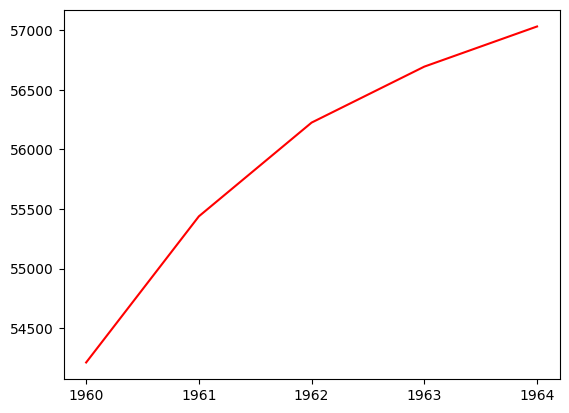

In [ ]:
plt.plot(df_merged['Years'].head(),df_merged['Population'].head(),color='red')
plt.show()

In [ ]:
fig = px.line(df_merged, x=df_merged['Years'], y=df_merged['Population'],
              labels={'Population': 'Population', 'Years': 'Years'},
              title='Population Trend Among Years',
              animation_frame='Country Code')


fig.show()


## Fertility Rate Over Years

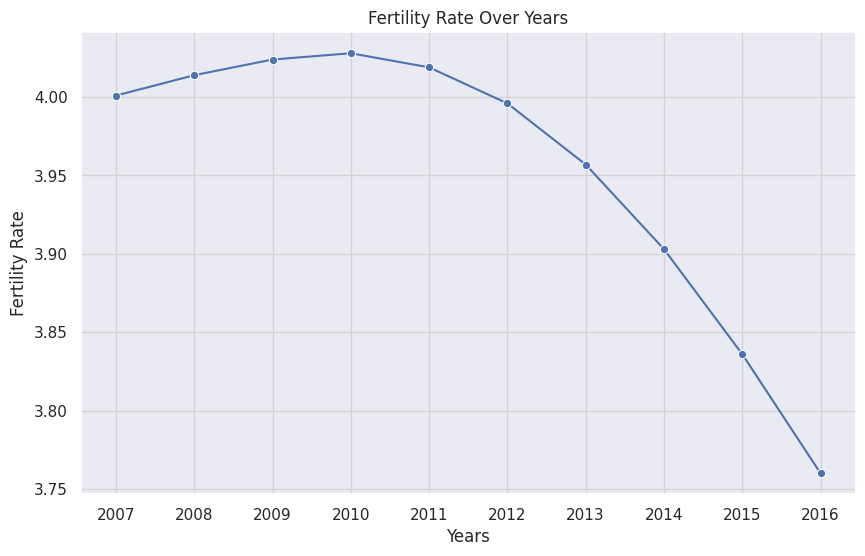

In [ ]:
sns.set(style="darkgrid", color_codes=True, rc={"grid.color": "lightgrey"})
plt.figure(figsize=(10, 6))
sns.lineplot(x=df_merged['Years'].tail(10), y=df_merged['Fertility_Rate'], data=df_merged, marker='o')

plt.xlabel('Years')
plt.ylabel('Fertility Rate')
plt.title('Fertility Rate Over Years')

plt.show()


## ScatterPlot

In [ ]:
df3

Country Code Years  Life_Expectancy
0              ABW  1960        65.662000
1              AFG  1960        32.292000
2              AGO  1960        33.251000
3              ALB  1960        62.279000
5              ARB  1960        46.825065
...            ...   ...              ...
15043          XKX  2016        71.646341
15044          YEM  2016        64.953000
15045          ZAF  2016        62.774000
15046          ZMB  2016        61.874000
15047          ZWE  2016        61.163000

[13747 rows x 3 columns]

In [ ]:
df = df3.sample(10)

fig = px.scatter(df, x='Country Code', y='Life_Expectancy', title='Life Expectancy in different Countries',
                 labels={'Country Code': 'Country', 'Life_Expectancy': 'Life Expectancy'},
                 color='Country Code', size='Life_Expectancy', hover_data=['Life_Expectancy'])


fig.show()


## HeatMap

<ipython-input-80-1ba083aaac29>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

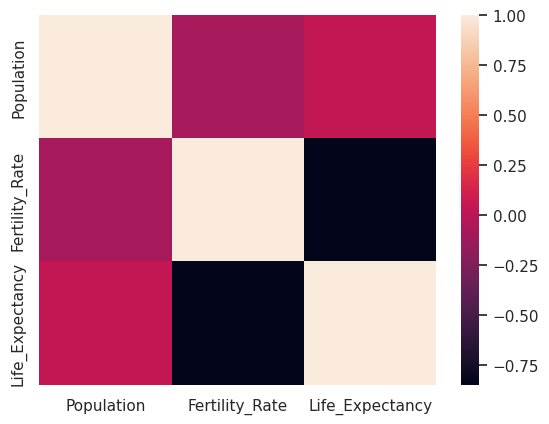

In [ ]:
sns.heatmap(df_merged.corr())

## BarGraph

In [ ]:
fig = px.bar(df_merged,
             x="Region",
             y="Population",
             animation_frame="Years",
             animation_group="Country Code",
             color="Region",
             range_y=[0, 2500000000],
             title="Region Wise Population",
             labels={"Population": "Total Population", "Region": "Geographic Region"}
             )


custom_colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]

fig.update_traces(marker=dict(color=custom_colors))

fig.update_layout(
    updatemenus=[
        dict(type='buttons',
             showactive=False,
             buttons=[
                 dict(label='Play',
                      method='animate',
                      args=[None, dict(frame=dict(duration=1000, redraw=True), fromcurrent=True)]),
                 dict(label='Stop',
                      method='animate',
                      args=[[None], dict(frame=dict(duration=0, redraw=True), mode='immediate', transition=dict(duration=0))])
             ])
    ])

fig.update_xaxes(categoryorder='total descending')

fig.update_layout(
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)',
)

fig.show()




In [ ]:
df = df_merged


fig = px.scatter(df, x='Fertility_Rate', y='Life_Expectancy', size='Population', color='Country Code',
                 animation_frame='Years', title='The trend of Life Expectancy and Fertility Rate over years for different Countries',
                 labels={'Fertility_Rate': 'Fertility_Rate', 'Life_Expectancy': 'Life Expectancy'},
                 size_max=100, range_x=[0,10], range_y=[10,100])

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)


fig.show()


## Regional Wise Analysis

<Axes: >

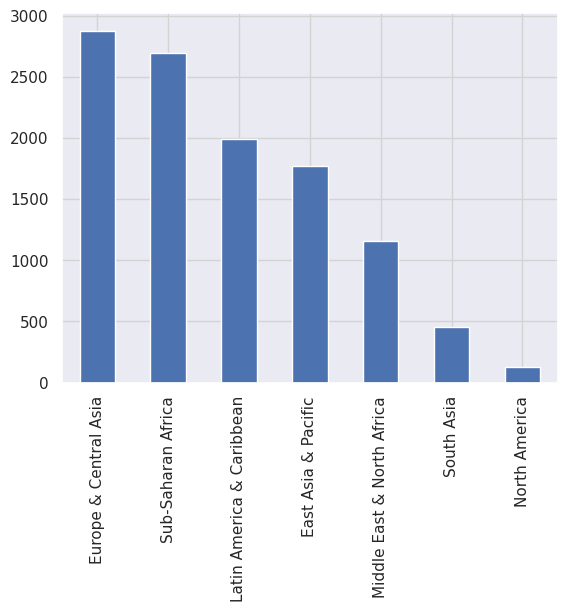

In [ ]:
df_merged['Region'].value_counts().plot(kind='bar')

<Axes: ylabel='Region'>

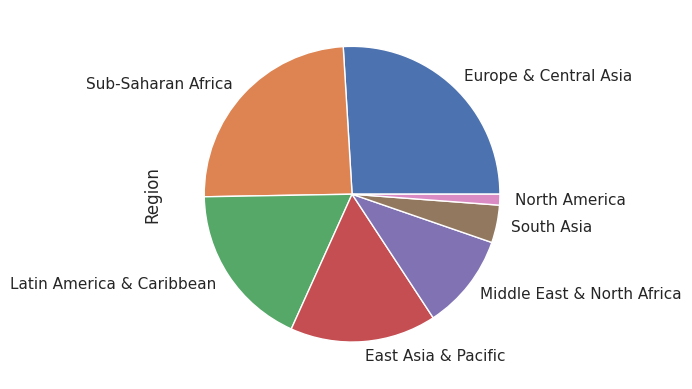

In [ ]:
df_merged['Region'].value_counts().plot(kind='pie')

<Axes: ylabel='Frequency'>

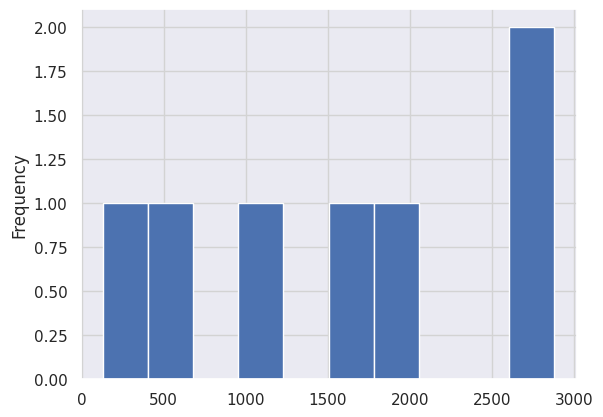

In [ ]:
df_merged['Region'].value_counts().plot(kind='hist')

In [ ]:

# Assuming df_merged is already defined

fig = px.scatter(df_merged, x='Fertility_Rate', y='Life_Expectancy', size='Population', color='Country Code',
                 animation_frame='Years', title='The trend of Life Expectancy and Fertility Rate over years for different Countries',
                 labels={'Fertility_Rate': 'Fertility_Rate', 'Life_Expectancy': 'Life Expectancy'},
                 size_max=100, range_x=[0, 10], range_y=[10, 100])

# Set the background color to black
fig.update_layout(plot_bgcolor='black')

# Remove grid lines for both x and y axes
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()